In [74]:
import pandas as pd
import matplotlib.pyplot as plt

results_long_lat = pd.read_table('/Users/carolineroper/Documents/Big Data/big_data_term_project/by_pickup_long_lat.out',\
        sep = "\t",\
        header = -1,\
        na_filter= False)

results_long_lat_citi = pd.read_table('/Users/carolineroper/Documents/Big Data/big_data_term_project/by_pickup_long_lat_citibike.out',\
        sep = "\t",\
        header = -1,\
        na_filter= False)

results_long_lat_citi.columns = ['Longitude', 'Latitude', 'Trips']

results_long_lat['Percent_Cab'] = results_long_lat['Trips']/sum(results_long_lat['Trips'])

results_long_lat_citi['Percent_Bike'] = \
results_long_lat_citi['Trips']/sum(results_long_lat_citi['Trips'])

merged_result = pd.merge(results_long_lat,results_long_lat_citi, on=['Longitude','Latitude'], how='outer').fillna(0)

top_by_bike = merged_result.sort('Percent_Bike', ascending=False)[0:500]

top_by_cab = merged_result.sort('Percent_Cab', ascending=False)[0:500]

In [114]:
top_by_cab = merged_result.sort('Percent_Cab', ascending=False)[0:500]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [115]:
top_by_bike = merged_result.sort('Percent_Bike', ascending=False)[0:500]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


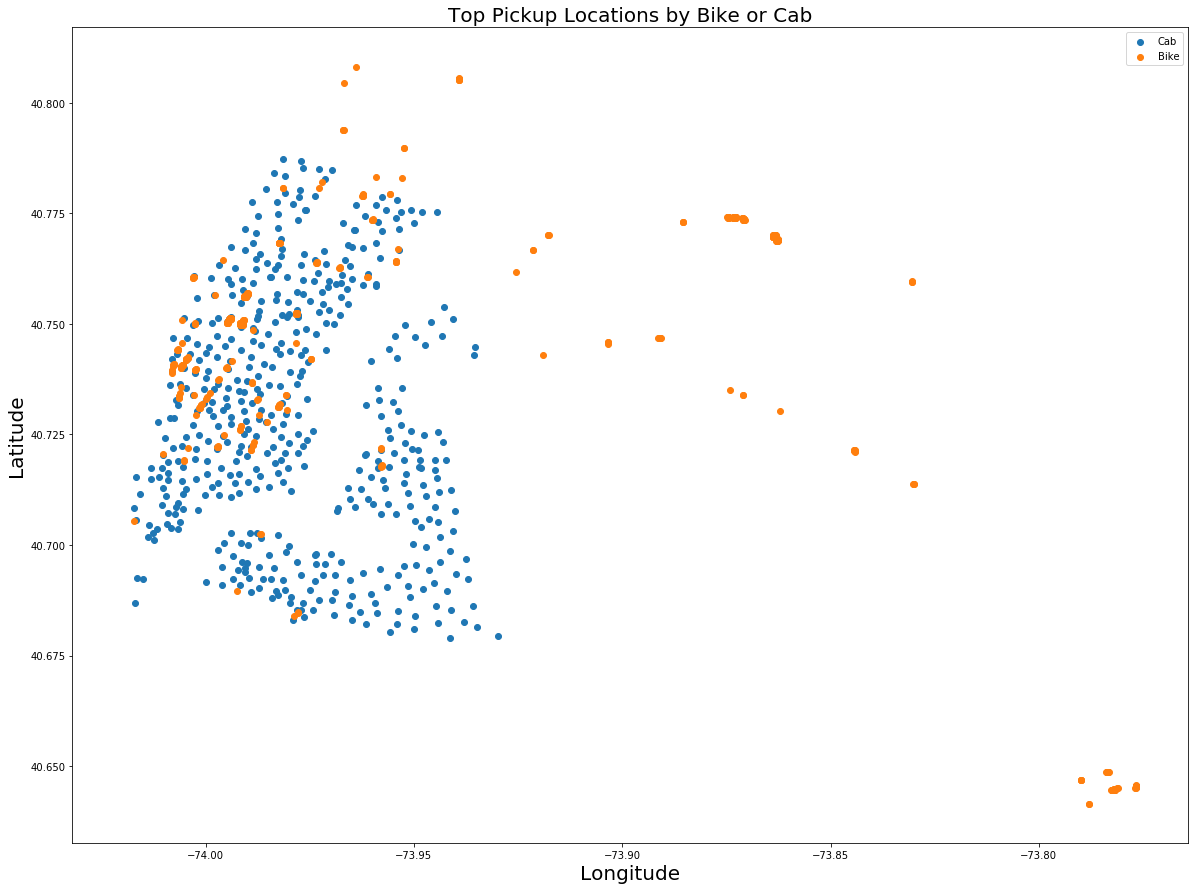

In [106]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)
ax1.set_title('Top Pickup Locations by Bike or Cab', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

x = top_by_bike['Longitude']
y = top_by_bike['Latitude']
ax1.scatter(x, y)

x2 = top_by_cab['Longitude']
y2 = top_by_cab['Latitude']
ax1.scatter(x2, y2)

xlab='Longitude'
ylab='Latitude'

ax1.legend(('Cab', 'Bike'))

plt.savefig('Top_Pickup_Locations.png')